# **Elizabeta**



Ajuste de entorno de trabajo con librerías

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import ast

In [ ]:
# Cargar los datos desde el archivo Excel
file_path = "/content/sample_data/muestra101_con_embeddings_consideraciones1.xlsx"
df = pd.read_excel(file_path)

In [ ]:
# Seleccionar columnas relevantes
columns = ['hechos-emb', 'pretensiones-emb', 'Consideraciones 1-emb',
           'Consideraciones 2-emb', 'Consideraciones 3-emb', 'Consideraciones 4-emb',
           'Etiqueta']
df = df[columns]

➗➗➗

Transformación de embeddings a cadenas de números, así garantizamos que el modelo pueda procesar la información

In [ ]:
# Convertir embeddings de texto de cadena a lista de valores
embedding_columns = ['hechos-emb', 'pretensiones-emb', 'Consideraciones 1-emb',
                     'Consideraciones 2-emb', 'Consideraciones 3-emb', 'Consideraciones 4-emb']

for col in embedding_columns:
    df[col] = df[col].apply(ast.literal_eval)

In [ ]:
# Separar características y etiquetas
X = np.array(df[embedding_columns].values.tolist())
y = df['Etiqueta'].values

División de datos en conjunto de prueba y entrenamiento 80% - 20%

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🌳🌳🌳🌳🌳
Inicialización del random forest

In [ ]:
# Inicializar y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)


RandomForestClassifier(random_state=42)

Primeros resultados obtenidos por el modelo

In [ ]:
# Predecir con el conjunto de prueba
y_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21

Confusion Matrix:
[[ 6  2]
 [ 2 11]]


A continuación se presentan las gráficas y métricas de evaluación del modelo

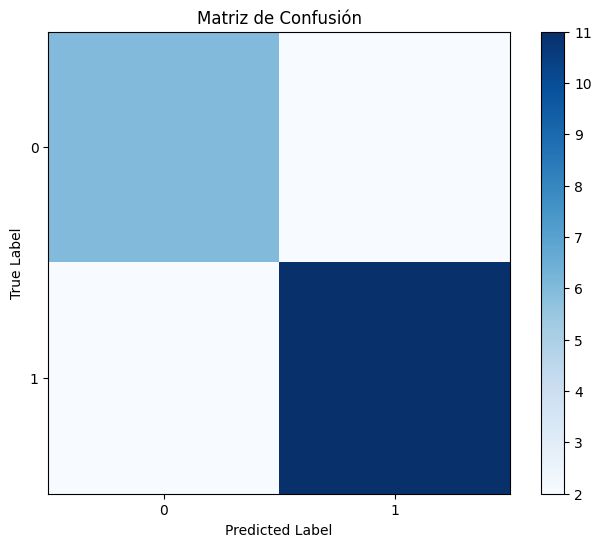

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()


Ejemplo 0:
Características (embeddings): [[ 0.04590385 -0.07369475 -0.07691104 ...  0.06824964 -0.02919916
   0.07289212]
 [ 0.05793635 -0.08780649 -0.04426854 ...  0.0675949  -0.01091093
   0.07239383]
 [ 0.01366655 -0.0635341  -0.06741054 ... -0.02503319  0.01420161
  -0.0441476 ]
 [ 0.02471452 -0.04762837 -0.05940744 ...  0.02448482  0.06457439
  -0.01858687]
 [ 0.08356142 -0.06578331 -0.04324664 ... -0.0171109   0.04597713
  -0.03449551]
 [ 0.02475382  0.00298741 -0.05965886 ...  0.04578602  0.0094625
  -0.04055043]]
Etiqueta verdadera: 1
Predicción: 1
Probabilidad de predicción: [0.13 0.87]

Ejemplo 1:
Características (embeddings): [[ 0.05908345 -0.0742392   0.01921596 ...  0.07646019  0.0364431
   0.05299472]
 [ 0.06352783 -0.07962762  0.02073331 ...  0.10945905  0.06467225
   0.01592871]
 [ 0.01696425  0.02189539 -0.0507885  ...  0.02806456 -0.00662559
  -0.06054875]
 [-0.03457235 -0.0214951   0.04122965 ...  0.02991374  0.12635311
  -0.005381  ]
 [-0.02423632 -0.08973712 -0.00

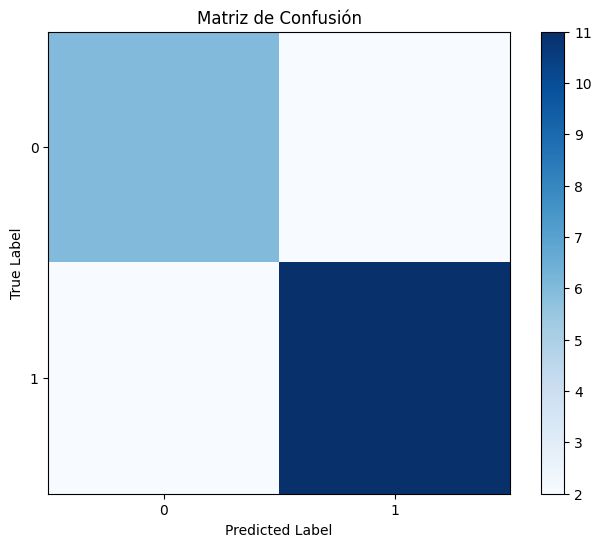

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predecir con el conjunto de prueba
y_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Obtener las probabilidades de predicción
y_pred_proba = rf_model.predict_proba(X_test.reshape(X_test.shape[0], -1))

# Mostrar ejemplos individuales y su proceso de toma de decisión
example_indices = [0, 1]  # Ejemplos que deseas visualizar (puedes cambiar estos índices)

for idx in example_indices:
    print(f"\nEjemplo {idx}:")
    print("Características (embeddings):", X_test[idx])
    print("Etiqueta verdadera:", y_test[idx])
    print("Predicción:", y_pred[idx])
    print("Probabilidad de predicción:", y_pred_proba[idx])

# Evaluar el modelo
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()

In [ ]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import ast
import os

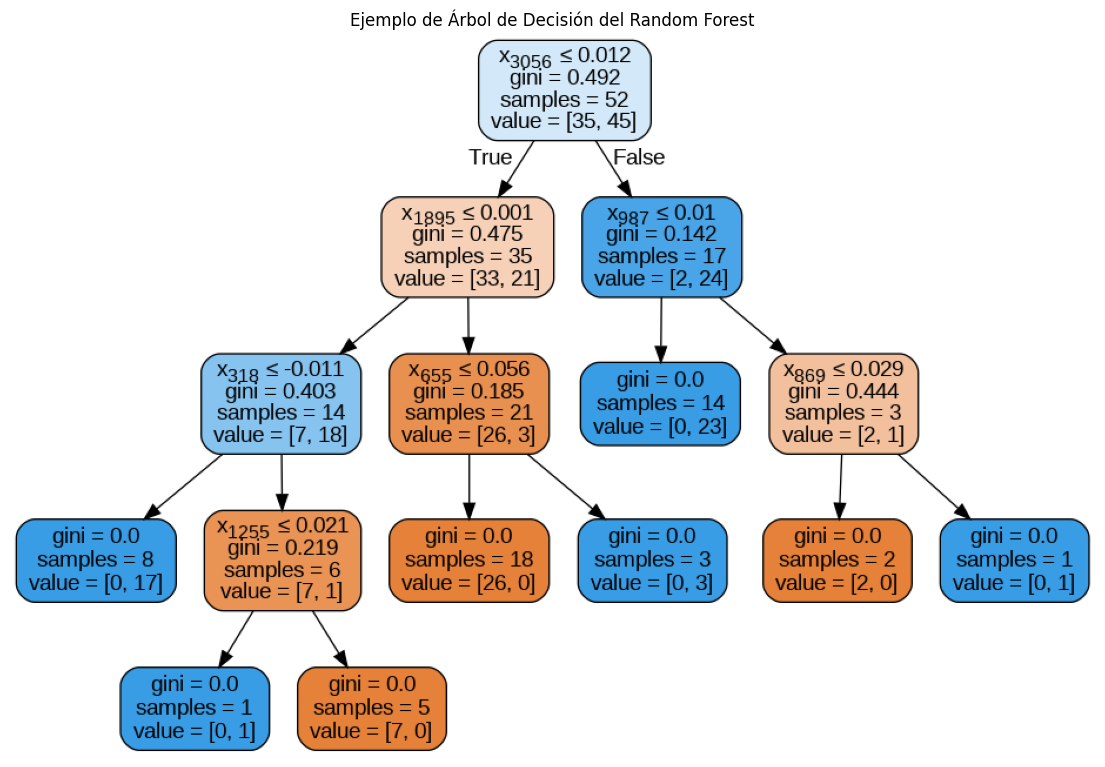

In [ ]:
# Visualización de un árbol del Random Forest
estimator = rf_model.estimators_[0]  # Selecciona el primer árbol (puedes cambiar el índice)
export_graphviz(estimator, out_file='tree.dot',
                filled=True, rounded=True,
                special_characters=True)

# Convertir el archivo .dot a formato PNG (requiere Graphviz instalado)
os.system('dot -Tpng tree.dot -o tree.png')

# Mostrar el árbol generado
plt.figure(figsize=(14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.title('Ejemplo de Árbol de Decisión del Random Forest')
plt.show()

In [ ]:
# Calculate accuracy on training data
y_train_pred = rf_model.predict(X_train.reshape(X_train.shape[0], -1))
train_accuracy = np.mean(y_train_pred == y_train)

# Calculate accuracy on test data
y_test_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
test_accuracy = np.mean(y_test_pred == y_test)

# Print the comparison
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.81


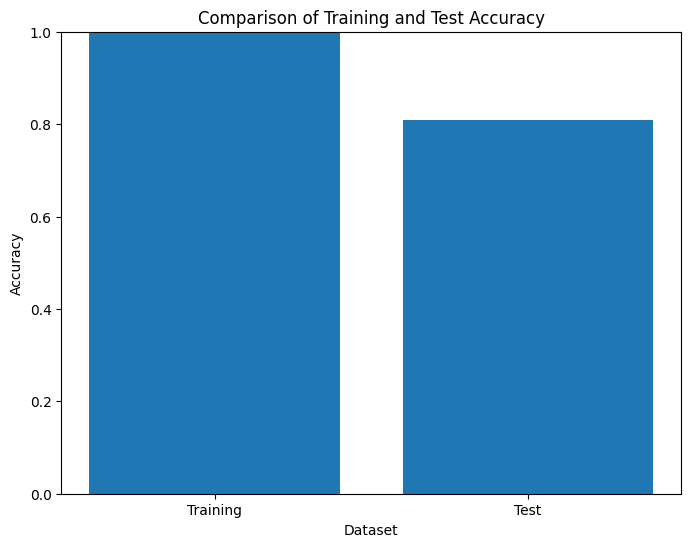

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar chart
accuracy_data = {'Dataset': ['Training', 'Test'], 'Accuracy': [train_accuracy, test_accuracy]}

# Create a DataFrame from the data
df_accuracy = pd.DataFrame(accuracy_data)

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_accuracy['Dataset'], df_accuracy['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Test Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 for accuracy
plt.show()

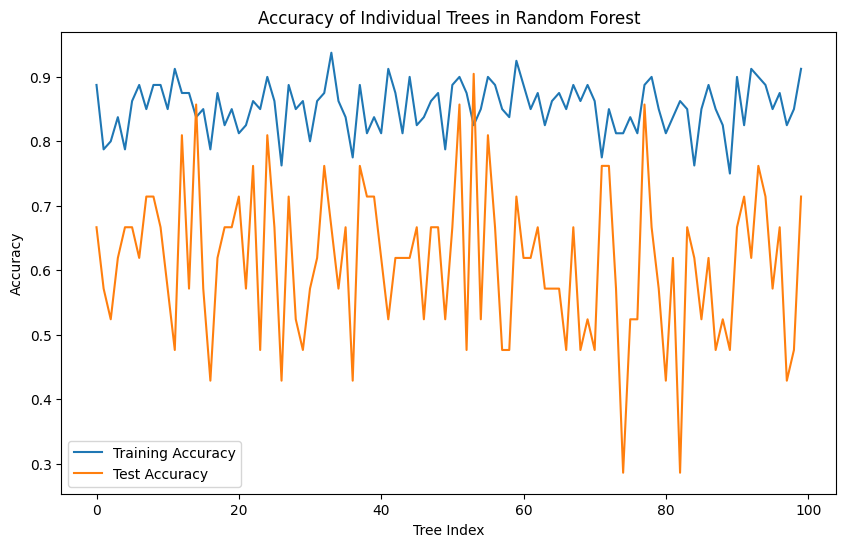

In [ ]:
train_scores = []
test_scores = []

for estimator in rf_model.estimators_:
    y_train_pred = estimator.predict(X_train.reshape(X_train.shape[0], -1))
    train_accuracy = np.mean(y_train_pred == y_train)
    train_scores.append(train_accuracy)

    y_test_pred = estimator.predict(X_test.reshape(X_test.shape[0], -1))
    test_accuracy = np.mean(y_test_pred == y_test)
    test_scores.append(test_accuracy)

# Plot the accuracies for each tree
plt.figure(figsize=(10, 6))
plt.plot(range(len(rf_model.estimators_)), train_scores, label='Training Accuracy')
plt.plot(range(len(rf_model.estimators_)), test_scores, label='Test Accuracy')
plt.xlabel('Tree Index')
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Trees in Random Forest')
plt.legend()
plt.show()

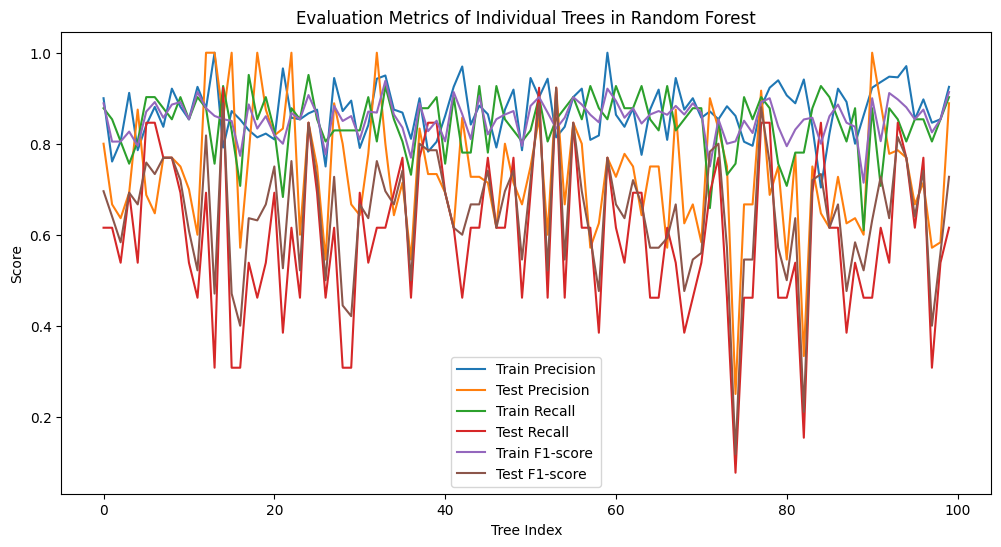

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []

for estimator in rf_model.estimators_:
    y_train_pred = estimator.predict(X_train.reshape(X_train.shape[0], -1))
    train_precision.append(precision_score(y_train, y_train_pred))
    train_recall.append(recall_score(y_train, y_train_pred))
    train_f1.append(f1_score(y_train, y_train_pred))

    y_test_pred = estimator.predict(X_test.reshape(X_test.shape[0], -1))
    test_precision.append(precision_score(y_test, y_test_pred))
    test_recall.append(recall_score(y_test, y_test_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

# Plot the metrics for each tree
plt.figure(figsize=(12, 6))
plt.plot(range(len(rf_model.estimators_)), train_precision, label='Train Precision')
plt.plot(range(len(rf_model.estimators_)), test_precision, label='Test Precision')
plt.plot(range(len(rf_model.estimators_)), train_recall, label='Train Recall')
plt.plot(range(len(rf_model.estimators_)), test_recall, label='Test Recall')
plt.plot(range(len(rf_model.estimators_)), train_f1, label='Train F1-score')
plt.plot(range(len(rf_model.estimators_)), test_f1, label='Test F1-score')
plt.xlabel('Tree Index')
plt.ylabel('Score')
plt.title('Evaluation Metrics of Individual Trees in Random Forest')
plt.legend()
plt.show()

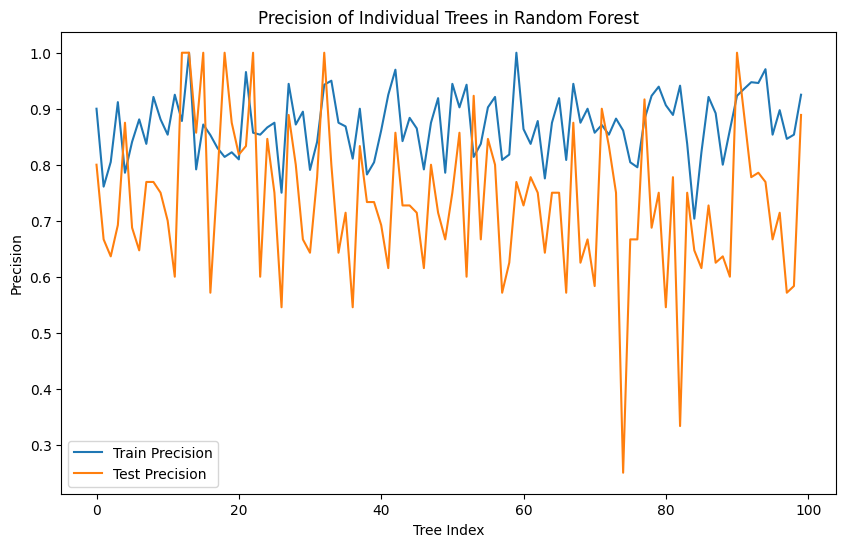

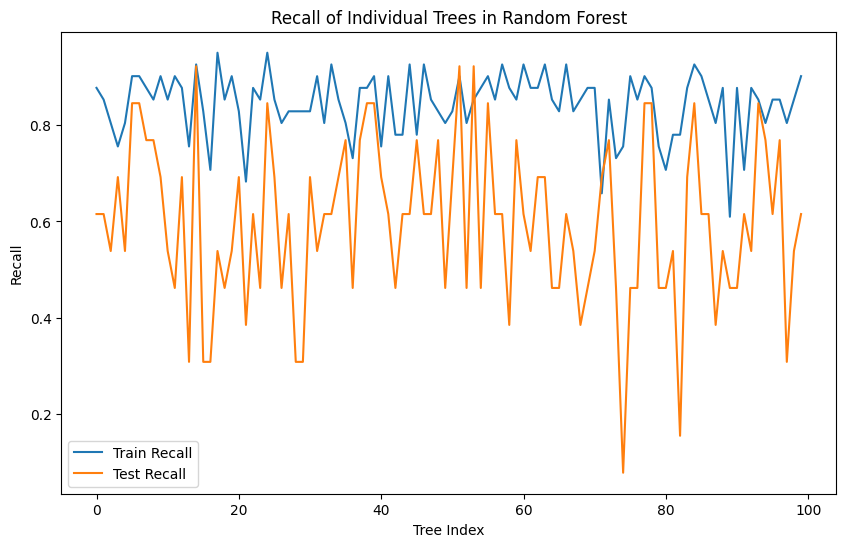

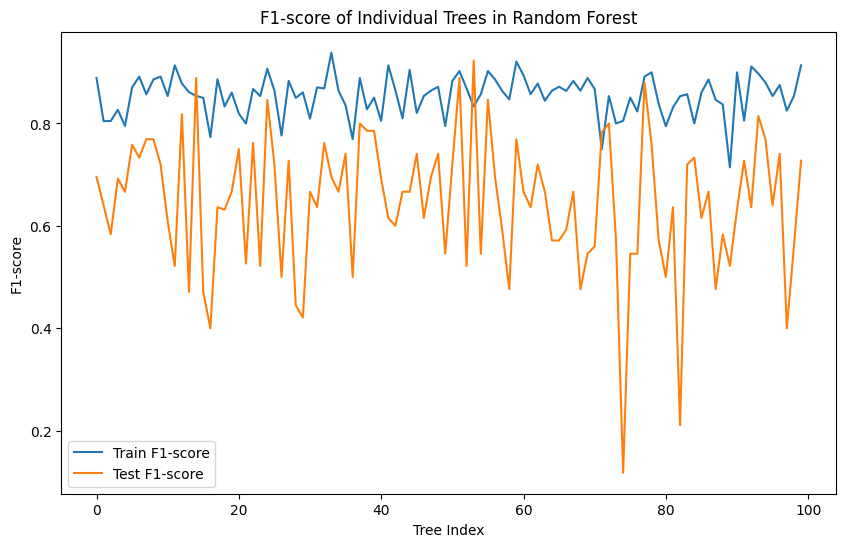

In [ ]:
# Plot Precision
plt.figure(figsize=(10, 6))
plt.plot(range(len(rf_model.estimators_)), train_precision, label='Train Precision')
plt.plot(range(len(rf_model.estimators_)), test_precision, label='Test Precision')
plt.xlabel('Tree Index')
plt.ylabel('Precision')
plt.title('Precision of Individual Trees in Random Forest')
plt.legend()
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
plt.plot(range(len(rf_model.estimators_)), train_recall, label='Train Recall')
plt.plot(range(len(rf_model.estimators_)), test_recall, label='Test Recall')
plt.xlabel('Tree Index')
plt.ylabel('Recall')
plt.title('Recall of Individual Trees in Random Forest')
plt.legend()
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
plt.plot(range(len(rf_model.estimators_)), train_f1, label='Train F1-score')
plt.plot(range(len(rf_model.estimators_)), test_f1, label='Test F1-score')
plt.xlabel('Tree Index')
plt.ylabel('F1-score')
plt.title('F1-score of Individual Trees in Random Forest')
plt.legend()
plt.show()

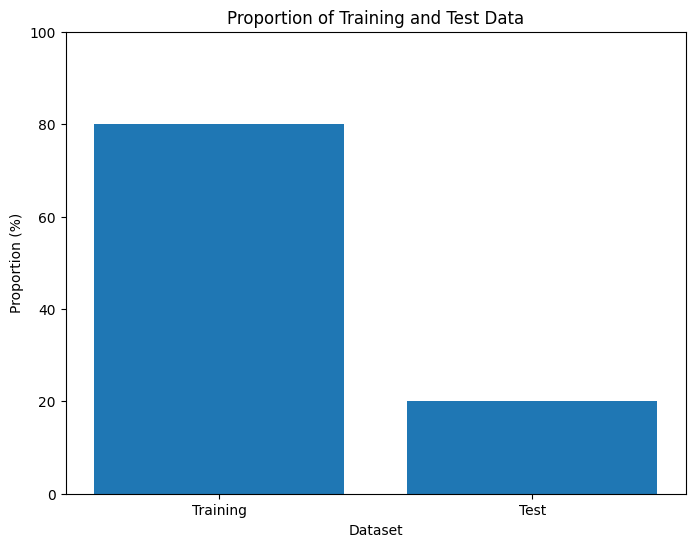

In [ ]:
# Datos para el gráfico de barras
proportions = {'Dataset': ['Training', 'Test'], 'Proportion': [0.8, 0.2]}

# Crear un DataFrame a partir de los datos
df_proportions = pd.DataFrame(proportions)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df_proportions['Dataset'], df_proportions['Proportion'] * 100)  # Multiplicar por 100 para obtener porcentajes
plt.xlabel('Dataset')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Training and Test Data')
plt.ylim(0, 100)  # Establecer los límites del eje y entre 0 y 100 para porcentajes
plt.show()

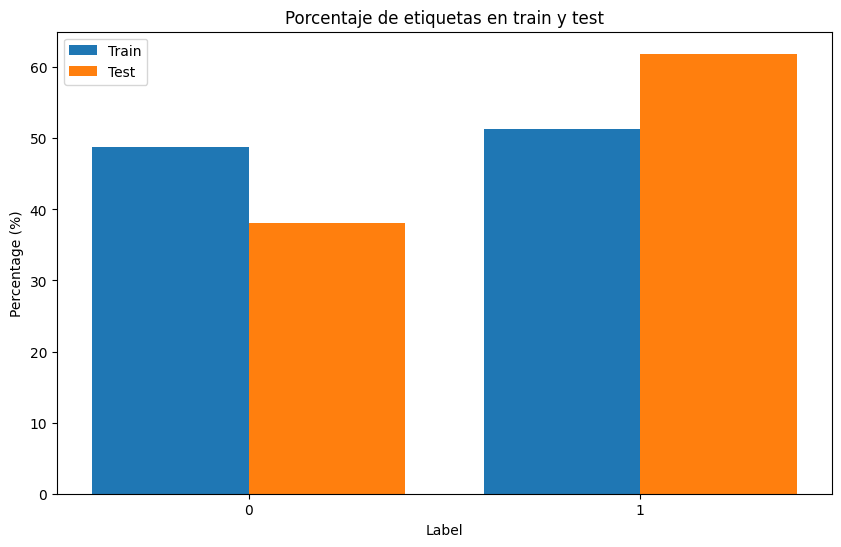

In [ ]:
# Calcular el porcentaje de cada etiqueta en los datos de entrenamiento
train_labels, train_counts = np.unique(y_train, return_counts=True)
train_percentages = train_counts / len(y_train) * 100

# Calcular el porcentaje de cada etiqueta en los datos de prueba
test_labels, test_counts = np.unique(y_test, return_counts=True)
test_percentages = test_counts / len(y_test) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(train_labels - 0.2, train_percentages, width=0.4, label='Train')
plt.bar(test_labels + 0.2, test_percentages, width=0.4, label='Test')
plt.xlabel('Label')
plt.ylabel('Percentage (%)')
plt.title('Porcentaje de etiquetas en train y test')
plt.xticks(train_labels)
plt.legend()
plt.show()

✏✏✏✏
##Visualización y explicabilidad del modelo


Las gráficas que se presentan a continuación muestran parte del funcionamiento del modelo, es decir, permiten comprender cómo el modelo ha llegado a clasificar la decisión de si el administrador es responsable o no. Una interfaz gráfica, sería de gran ayuda al momento del despliegue y desarrollo del modelo

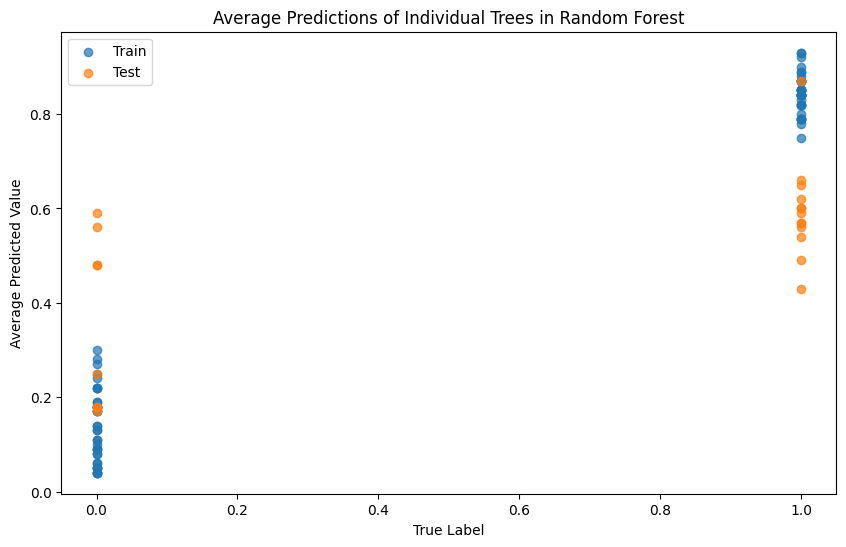

In [ ]:
# Calcula las predicciones de cada árbol para los datos de entrenamiento y prueba
train_predictions = [estimator.predict(X_train.reshape(X_train.shape[0], -1)) for estimator in rf_model.estimators_]
test_predictions = [estimator.predict(X_test.reshape(X_test.shape[0], -1)) for estimator in rf_model.estimators_]

# Calcula el promedio de las predicciones para cada instancia en entrenamiento y prueba
average_train_predictions = np.mean(train_predictions, axis=0)
average_test_predictions = np.mean(test_predictions, axis=0)

# Crea una gráfica de dispersión para mostrar la relación entre las predicciones promedio y las etiquetas verdaderas
plt.figure(figsize=(10, 6))
plt.scatter(y_train, average_train_predictions, label='Train', alpha=0.7)
plt.scatter(y_test, average_test_predictions, label='Test', alpha=0.7)
plt.xlabel('True Label')
plt.ylabel('Average Predicted Value')
plt.title('Average Predictions of Individual Trees in Random Forest')
plt.legend()
plt.show()

💡💡
La gráfica "proceso de decisión para un caso en particular" muestra información relevante para comprender el proceso de Elizabeta. Cada punto significa el peso que los árboles dieron a cada insight, en cada iteración. La línea roja, muestra el resultado final, es decir, la etiqueta seleccionada.
💡💡

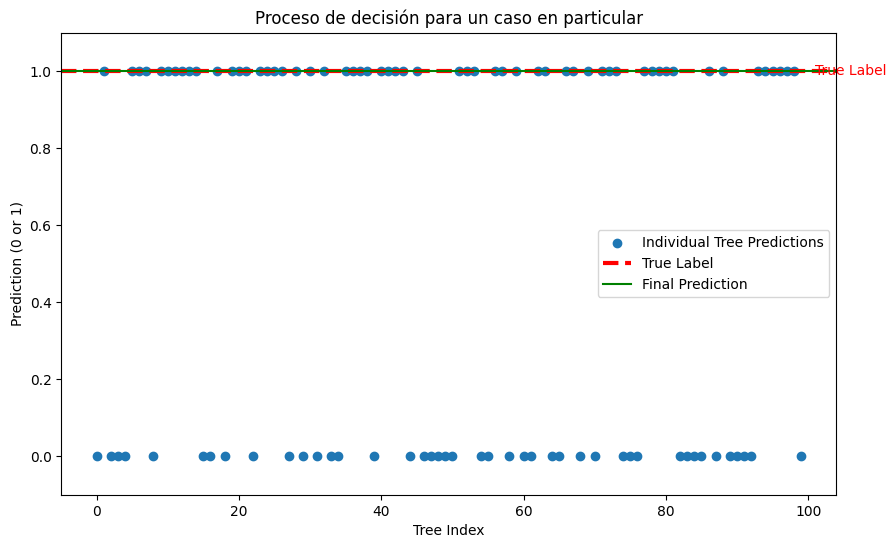

In [ ]:
# Selecciona un caso (índice) para visualizar
case_index = 20  # Puedes cambiar este índice

# Obtiene las predicciones de cada árbol para el caso seleccionado
case_predictions = [estimator.predict(X_test[case_index].reshape(1, -1))[0] for estimator in rf_model.estimators_]

# Crea una gráfica de dispersión para mostrar las predicciones de cada árbol
plt.figure(figsize=(10, 6))
plt.scatter(range(len(rf_model.estimators_)), case_predictions, label='Individual Tree Predictions')
plt.axhline(y=y_test[case_index], color='red', linestyle='--', label='True Label', linewidth=3)  # Increased linewidth
plt.axhline(y=rf_model.predict(X_test[case_index].reshape(1, -1))[0], color='green', linestyle='-', label='Final Prediction')
plt.text(len(rf_model.estimators_) + 1, y_test[case_index], 'True Label', color='red', va='center')  # Added text label
plt.xlabel('Tree Index')
plt.ylabel('Prediction (0 or 1)')
plt.title('Proceso de decisión para un caso en particular')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

¿Cuál característica fue decisiva? Esta es la pregunta con la que se responde a través de esta gráfica

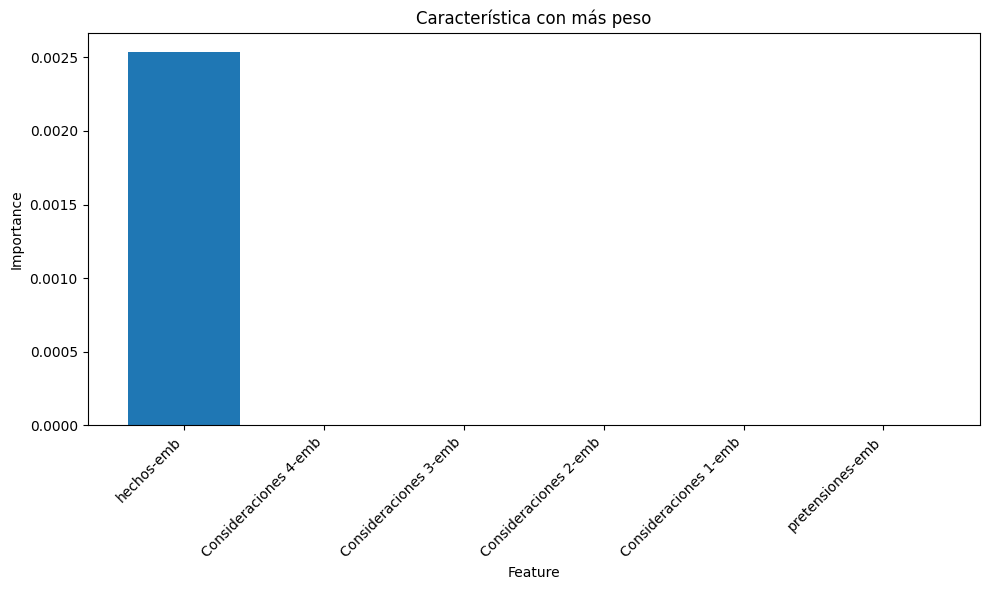

In [ ]:
# Recalculate feature importances (assuming X contains ALL features used for training)
importances = rf_model.feature_importances_

# Sort features by importance (considering ALL features)
sorted_indices = np.argsort(importances)[::-1]

# Number of embedding features
num_embedding_features = len(embedding_columns)

# Indices of embedding features within the original feature set (assuming they come first)
embedding_indices_in_X = np.arange(num_embedding_features)

# Find the positions of embedding feature indices within the sorted indices
relevant_indices_positions = np.where(np.isin(sorted_indices, embedding_indices_in_X))[0]

# Extract the importances for embedding features
embedding_importances = importances[sorted_indices[relevant_indices_positions]]

# Get names of embedding features
feature_names = np.array(embedding_columns)[np.argsort(embedding_importances)[::-1]]

# Create a bar chart to display feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(num_embedding_features), embedding_importances[np.argsort(embedding_importances)[::-1]])
plt.xticks(range(num_embedding_features), feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Característica con más peso')
plt.tight_layout()
plt.show()

🎌🎌🎌🎌🎌🎌
Alerta... al calcular la métrica del cross validation, identificamos que los resultados del modelo no resltuvan ser tan óptimos como lo indicaban las otras medidas 🎌🎌🎌🎌🎌🎌

In [ ]:
from sklearn.metrics import classification_report

# Predice en los datos de entrenamiento
y_train_pred = rf_model.predict(X_train.reshape(X_train.shape[0], -1))

# Predice en los datos de prueba
y_test_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Genera informes de clasificación para entrenamiento y prueba
print("Informe de clasificación para datos de entrenamiento:")
print(classification_report(y_train, y_train_pred))

print("\nInforme de clasificación para datos de prueba:")
print(classification_report(y_test, y_test_pred))

Informe de clasificación para datos de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Informe de clasificación para datos de prueba:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21



👎👎👎👎
*** malas noticias

Puntajes de validación cruzada: [0.47619048 0.55       0.75       0.55       0.7       ]
Puntaje promedio de validación cruzada: 0.6052380952380952


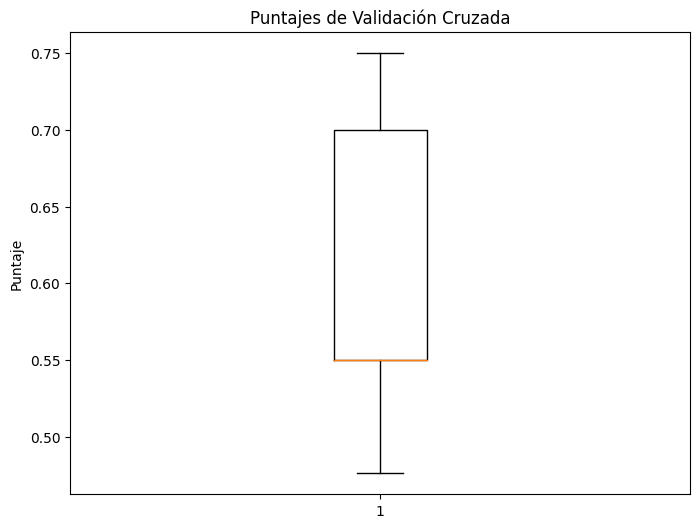

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Realiza validación cruzada (por ejemplo, con 5 folds)
cv_scores = cross_val_score(rf_model, X.reshape(X.shape[0], -1), y, cv=5)

# Imprime los puntajes de cada fold
print("Puntajes de validación cruzada:", cv_scores)

# Calcula e imprime el puntaje promedio
average_cv_score = np.mean(cv_scores)
print("Puntaje promedio de validación cruzada:", average_cv_score)

# Crea una gráfica de caja para visualizar los puntajes de validación cruzada
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Puntajes de Validación Cruzada')
plt.ylabel('Puntaje')
plt.show()

🇵🇵🇵
Intento 1 para mejorar los resultados de Elizabeta a través de la implementación de un GridSearch

Pese a estos parámetros, el modelo no tuvo mejoras significativas, como podrá verse en las métricas

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    # ... otros hiperparámetros a ajustar
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X.reshape(X.shape[0], -1), y)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 300}


Puntajes de validación cruzada: [0.47619048 0.6        0.85       0.65       0.6       ]
Puntaje promedio de validación cruzada: 0.6352380952380952

Informe de clasificación para datos de prueba:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21


Matriz de Confusión:
[[ 6  2]
 [ 2 11]]


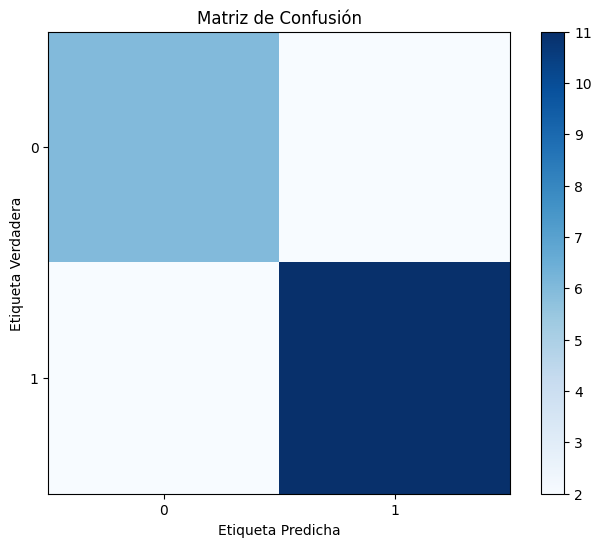

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Crea el modelo con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)

# Divide los datos en entrenamiento y prueba (si aún no lo has hecho)
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Realiza validación cruzada (por ejemplo, con 5 folds)
cv_scores = cross_val_score(best_rf_model, X.reshape(X.shape[0], -1), y, cv=5)

# Imprime los puntajes de cada fold y el promedio
print("Puntajes de validación cruzada:", cv_scores)
print("Puntaje promedio de validación cruzada:", np.mean(cv_scores))

# Predice en los datos de prueba
y_test_pred = best_rf_model.predict(X_test)

# Genera el informe de clasificación para los datos de prueba
print("\nInforme de clasificación para datos de prueba:")
print(classification_report(y_test, y_test_pred))

# Calcula y muestra la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Crea una gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()

👍👍👍👍
Segundo intento, mejora significativa... Bienvenida Elizabeta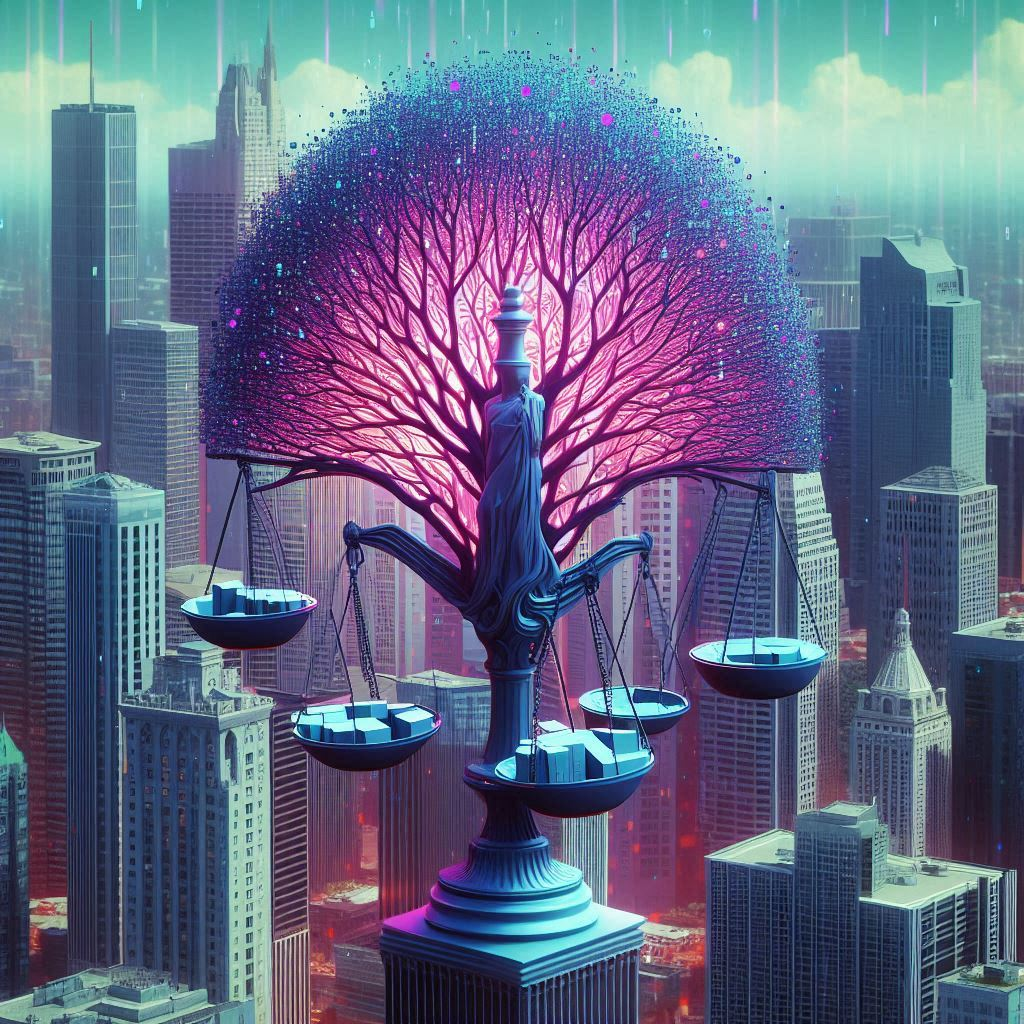

:

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Mejores hiperparámetros encontrados por GridSearchCV:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Puntajes de validación cruzada: [0.68181818 0.68181818 0.81818182 0.85714286 0.85714286]
Puntaje promedio de validación cruzada: 0.7792207792207793

Informe de clasificación para datos de prueba:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21


Matriz de Confusión:
[[ 6  2]
 [ 2 11]]


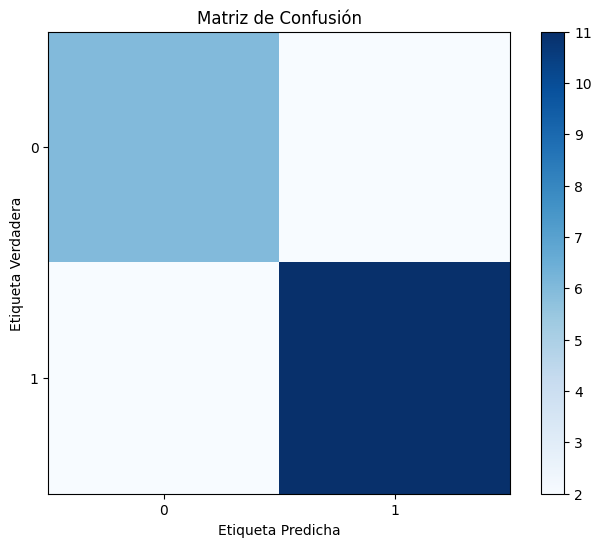

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Crear el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV con StratifiedKFold
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=StratifiedKFold(5), n_jobs=-1, verbose=2, scoring='accuracy')

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.reshape(X.shape[0], -1), y)

# Escalar las características
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Ajustar GridSearchCV con los datos balanceados y escalados
grid_search.fit(X_resampled, y_resampled)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados por GridSearchCV:")
print(best_params)

# Crear el modelo con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Dividir los datos originales en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, test_size=0.2, random_state=42)

# Escalar los datos de entrenamiento y prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Realizar validación cruzada con los datos balanceados y escalados
cv_scores = cross_val_score(best_rf_model, X_resampled, y_resampled, cv=StratifiedKFold(5))

# Imprimir los puntajes de cada fold y el promedio
print("Puntajes de validación cruzada:", cv_scores)
print("Puntaje promedio de validación cruzada:", np.mean(cv_scores))

# Predecir en los datos de prueba
y_test_pred = best_rf_model.predict(X_test)

# Generar el informe de clasificación para los datos de prueba
print("\nInforme de clasificación para datos de prueba:")
print(classification_report(y_test, y_test_pred))

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Crear una gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()


Podemos ver la mejora significativa del modelo tras optimizar los hiperparámetros, muestra de ello es el comportamiento de la validación cruzada
---



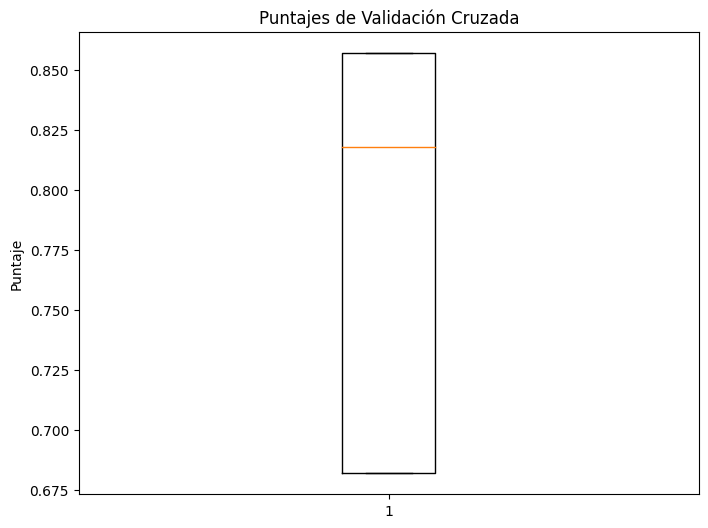

In [ ]:
import matplotlib.pyplot as plt

# Puntajes de validación cruzada
cv_scores = [0.68181818, 0.68181818, 0.81818182, 0.85714286, 0.85714286]

# Crea el diagrama de caja
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Puntajes de Validación Cruzada')
plt.ylabel('Puntaje')
plt.show()